In [1]:
!pip install rasterio

  Using cached rasterio-1.4.3-cp39-cp39-macosx_14_0_arm64.whl.metadata (9.1 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached rasterio-1.4.3-cp39-cp39-macosx_14_0_arm64.whl (18.8 MB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)


In [2]:
!pip install richdem

  Using cached richdem-0.3.4-cp39-cp39-macosx_11_0_arm64.whl
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [3]:
!pip install geopandas

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.10.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (5.5 kB)
  Using cached pandas-2.2.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pyproj-3.6.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (31 kB)
  Using cached shapely-2.0.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.8 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached pandas-2.2.3-cp39-cp39-macosx_11_0_arm64.whl (11.3 MB)
Using cached pyogrio-0.10.0-cp39-cp39-macosx_12_0_arm64.whl (15.1 MB)
Using cached pyproj-3.6.1-cp39-cp39-macosx_11_0_arm64.whl (4.9 MB)
Using cached shapely-2.0.7-cp39-cp39-macosx_11_0_arm64.whl (1.3 MB)


In [4]:
!pip install rasterstats

  Using cached rasterstats-0.20.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached fiona-1.10.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (56 kB)
  Using cached simplejson-3.20.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (3.3 kB)
Using cached rasterstats-0.20.0-py3-none-any.whl (17 kB)
Using cached fiona-1.10.1-cp39-cp39-macosx_11_0_arm64.whl (14.8 MB)
Using cached simplejson-3.20.1-cp39-cp39-macosx_11_0_arm64.whl (75 kB)


In [5]:
!pip install numpy

In [6]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import richdem as rd
import geopandas as gpd
from rasterstats import zonal_stats

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.0, 'width': 9597, 'height': 11657, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.000833333329998958, 0.0, 33.909583213,
       0.0, -0.0008333333300162993, 5.033750181), 'blockxsize': 9597, 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
Bounds: BoundingBox(left=33.909583213, bottom=-4.680416447000001, right=41.907083181, top=5.033750181)
NoData: (-99999.0,)


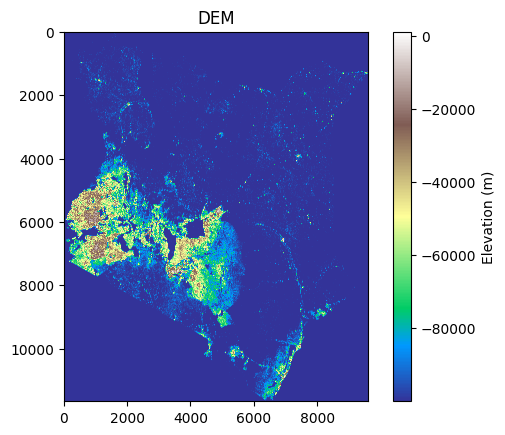

In [9]:
with rasterio.open("/Users/theodoreutomo/algoverse-research-project/data/raw/population/KEN_population_v1_0_gridded.tif") as src:
    print(src.profile)     # dtype, crs, transform, width/height, count (bands)
    print("Bounds:", src.bounds)
    print("NoData:", src.nodatavals)
    band1 = src.read(1)
    dem       = src.read(1)
    transform = src.transform
    meta      = src.meta.copy()

plt.imshow(band1, cmap="terrain")   
plt.colorbar(label="Elevation (m)")
plt.title("DEM")
plt.show()

In [10]:
# 2) pixel size in x and y (transform[0] is x‐res, transform[4] is negative y‐res)
dx = transform.a    # usually positive
dy = -transform.e   # make positive

# 3) compute gradients
#    np.gradient returns [∂z/∂row, ∂z/∂col], so scale by dy, dx respectively
dz_dy, dz_dx = np.gradient(dem, dy, dx)

# 4) slope in radians, then convert to degrees
slope = np.degrees(np.arctan(np.hypot(dz_dx, dz_dy)))

# 5) write out
meta.update(dtype=rasterio.float32, count=1)
with rasterio.open("slope.tif", "w", **meta) as dst:
    dst.write(slope.astype(rasterio.float32), 1)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.0, 'width': 9597, 'height': 11657, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.000833333329998958, 0.0, 33.909583213,
       0.0, -0.0008333333300162993, 5.033750181), 'blockxsize': 9597, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}
Bounds: BoundingBox(left=33.909583213, bottom=-4.680416447000001, right=41.907083181, top=5.033750181)
NoData value: (-99999.0,)


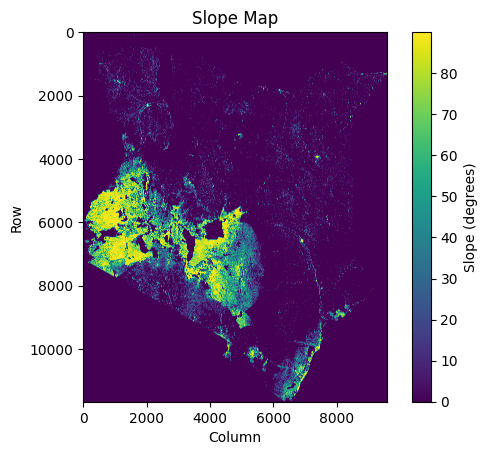

In [15]:
with rasterio.open("/Users/theodoreutomo/algoverse-research-project/analysis/population/slope.tif") as src:
    print(src.profile)
    print("Bounds:", src.bounds)
    print("NoData value:", src.nodatavals)
    slope = src.read(1)
plt.imshow(slope)        # default colormap
plt.colorbar(label="Slope (degrees)")
plt.title("Slope Map")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

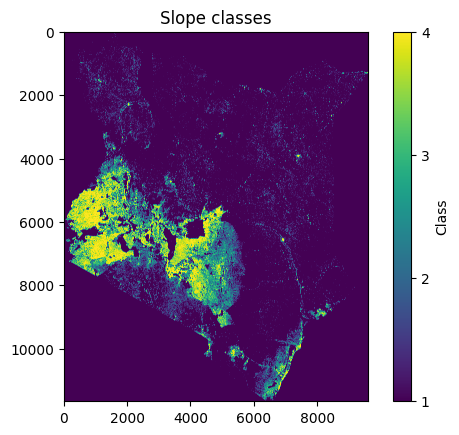

In [17]:
classes = np.zeros_like(slope, dtype=np.uint8)
classes[(slope>=0)   & (slope<5)]  = 1  # gentle
classes[(slope>=5)   & (slope<15)] = 2  # moderate
classes[(slope>=15)  & (slope<30)] = 3  # steep
classes[slope>=30]               = 4  # very steep

plt.imshow(classes)
plt.colorbar(ticks=[1,2,3,4], label="Class")
plt.title("Slope classes")
plt.show()